In [46]:
import tensorflow as tf
from tensorflow.keras import models, layers,datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [20]:
dataset = datasets.cifar10.load_data()
(Xtrain,Ytrain),(Xtest,Ytest) = dataset

In [21]:
Xtrain.shape

(50000, 32, 32, 3)

In [22]:
Ytrain = Ytrain.reshape(-1,)
Ytest = Ytest.reshape(-1,)
Ytrain.shape

(50000,)

In [23]:
Xtest.shape

(10000, 32, 32, 3)

In [24]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [25]:
classes[9]

'truck'

In [26]:
#writing a function to plotting a sample

def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

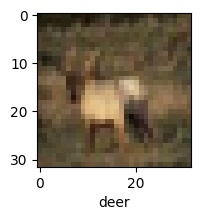

In [27]:
plot_sample(Xtrain,Ytrain,3)

## Building the cnn model

In [32]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #layers
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [33]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
cnn.fit(Xtrain,Ytrain,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.9489 - accuracy: 0.4036
Epoch 2/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.2999 - accuracy: 0.5398
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1512 - accuracy: 0.5951
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0467 - accuracy: 0.6364
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9709 - accuracy: 0.6623
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9001 - accuracy: 0.6886
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8462 - accuracy: 0.7053
Epoch 8/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7940 - accuracy: 0.7249
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7527 - accuracy: 0.7376
Epoch 10/10
1563/1563 [==============================] - 60s 38m

In [35]:
  cnn.evaluate(Xtest,Ytest)

313/313 [==============================] - 5s 16ms/step - loss: 1.1040 - accuracy: 0.6525


[1.1040197610855103, 0.6524999737739563]

In [36]:
y_pred = cnn.predict(Xtest)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[3.2551124e-04, 1.6796312e-04, 3.9525013e-03, 9.1990310e-01,
        2.3250086e-03, 3.7693474e-02, 3.1997330e-02, 7.2336137e-05,
        2.5701053e-03, 9.9268544e-04],
       [3.2585257e-04, 1.3845299e-04, 1.2051428e-08, 8.5141515e-08,
        3.4371173e-11, 3.4568512e-09, 2.3412096e-07, 3.7923831e-12,
        9.9949902e-01, 3.6189271e-05],
       [6.9470391e-02, 3.0073753e-01, 5.0528732e-04, 3.6140438e-03,
        1.3335737e-03, 1.2532044e-03, 5.1123598e-03, 1.6149560e-04,
        4.6964705e-01, 1.4816509e-01],
       [9.3674409e-01, 2.9112375e-04, 2.5648912e-03, 1.3096548e-03,
        1.1985800e-03, 1.6400218e-04, 1.1446660e-03, 3.3800574e-05,
        5.3964432e-02, 2.5848735e-03],
       [7.0852644e-07, 2.8672619e-06, 1.2063194e-02, 2.1968354e-01,
        4.2697012e-01, 1.1541899e-02, 3.2970858e-01, 2.6987746e-05,
        7.4363771e-07, 1.3390318e-06]], dtype=float32)

In [37]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [39]:
Ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

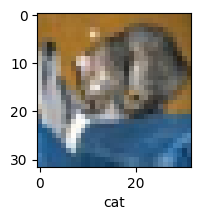

In [42]:
plot_sample(Xtest,Ytest,0)

In [43]:
classes[y_classes[0]]

'cat'

In [48]:
print("Classification report: \n",classification_report(Ytest,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.65      0.70      1000
           1       0.83      0.73      0.77      1000
           2       0.59      0.48      0.53      1000
           3       0.45      0.48      0.47      1000
           4       0.54      0.68      0.60      1000
           5       0.55      0.53      0.54      1000
           6       0.68      0.78      0.73      1000
           7       0.71      0.65      0.68      1000
           8       0.73      0.82      0.77      1000
           9       0.73      0.73      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

